# Постановка задачи
Имеются данные за продолжительное время, описывающие стоимость пальмового масла. Необходимо применить различные методы для прогнозирования стоимости в будущем.

Помимо этого, присутствуюит и другие данные, которые замерены во времени.

# Как будет оцениваться качество модели?

Основной метрикой будет MAPE:

**$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%$**

Где:
$\( n \)$ - количество наблюдений,
$\( y_i \)$ - фактическое значение,
$\( \hat{y}_i \)$ - прогнозное значение.





# Краткая интерпретация метрики MAPE

MAPE измеряет процентное отклонение прогнозных значений от фактических значений. Например, если MAPE равен 5%, это означает, что средняя ошибка прогноза составляет 5% от фактической стоимости масла.

# План отчета

+ Обзор данных
+ Исследовательский анализ данных
+ Предобработка данных
+ Построение Графиков
+ Первичный feature engineering

# Обзор данных

Загрузим все нужные библиотеки

In [429]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython import display
from phik import phik_matrix
from sklearn.preprocessing import LabelEncoder

In [430]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

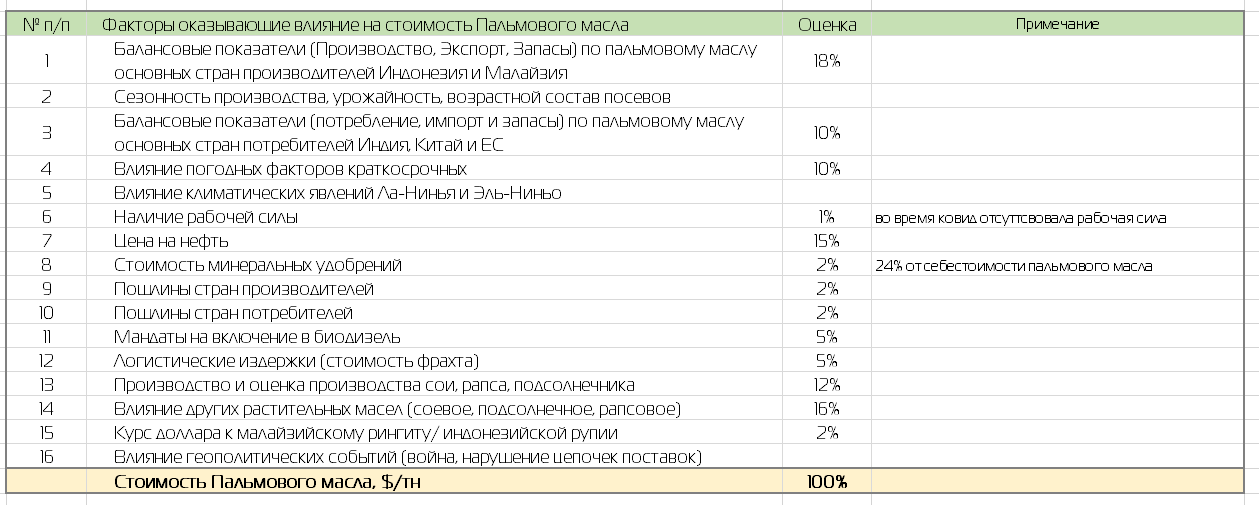

In [431]:
display.Image("../data/pictures/img.png")

In [432]:
df = pd.read_excel('../data/raw/data_raw.xlsx', engine='openpyxl')

In [433]:
df.head()

,Дата,Цена соевого масла_Роттердам,Цена соевого масла_Бразилия,Цена соевого масла_Аргентина,Цена сои_Бразилия,Рупии к $,Юань к $,Евро к $,Рубль к $,Ринггит к $,Цена нефти_Brent,Цена нефти_Urals,Цена сырого пальмового масла,Цена рафинированного пальмового масла,Цена пальмового масла_Аргентина,Цена биодизеля_США
0,2010-06-16,705.0,829.6,778.90,370.2,46.37,6.8323,1.2306,31.2083,3.2560,78.68,75.52,752.5,NaN,NaN,NaN
1,2010-06-17,706.0,827.8,780.44,369.2,46.20,6.8290,1.2378,30.9400,3.2575,79.14,76.82,752.5,NaN,NaN,NaN
2,2010-06-18,705.0,825.0,784.85,374.0,46.01,6.8267,1.2384,30.9745,3.2515,78.74,76.35,752.5,NaN,855.0,NaN
3,2010-06-19,705.0,825.0,784.85,374.0,46.01,6.8267,1.2384,30.9745,3.2515,78.74,76.35,752.5,NaN,855.0,NaN
4,2010-06-20,705.0,825.0,784.85,374.0,46.01,6.8267,1.2384,30.9745,3.2515,78.74,76.35,752.5,NaN,855.0,NaN


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Дата                                   4984 non-null   datetime64[ns]
 1   Цена соевого масла_Роттердам           4984 non-null   float64       
 2   Цена соевого масла_Бразилия            4984 non-null   float64       
 3   Цена соевого масла_Аргентина           4984 non-null   float64       
 4   Цена сои_Бразилия                      4984 non-null   float64       
 5   Рупии к $                              4984 non-null   float64       
 6   Юань к $                               4984 non-null   float64       
 7   Евро к $                               4984 non-null   float64       
 8   Рубль к $                              4984 non-null   float64       
 9   Ринггит к $                            4984 non-null   float64 

In [435]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Дата,4984,2017-04-11 12:00:00,2010-06-16 00:00:00,2013-11-12 18:00:00,2017-04-11 12:00:00,2020-09-08 06:00:00,2024-02-06 00:00:00,NaN
Цена соевого масла_Роттердам,4984.0,880.142155,605.0,695.0,770.0,965.0,1980.0,268.275269
Цена соевого масла_Бразилия,4984.0,950.315449,567.9,729.7,885.8,1146.4,2096.6,270.105718
Цена соевого масла_Аргентина,4984.0,935.336971,547.19,718.49,866.42,1139.8,2068.17,268.193179
Цена сои_Бразилия,4984.0,468.506236,317.2,385.0,472.6,534.025,797.6,93.714222
Рупии к $,4984.0,65.736836,43.9,60.275,66.633,73.556,83.426,10.547834
Юань к $,4984.0,6.58275,6.0402,6.3199,6.5395,6.86455,7.343,0.323863
Евро к $,4984.0,1.192243,0.9592,1.102975,1.1622,1.294025,1.4826,0.112464
Рубль к $,4984.0,56.400553,27.33,33.008875,61.5,69.693,135.5,19.097989
Ринггит к $,4984.0,3.851599,2.937,3.208,4.0885,4.236,4.79,0.543178


In [436]:
df.columns

Index(['Дата', 'Цена соевого масла_Роттердам', 'Цена соевого масла_Бразилия',
       'Цена соевого масла_Аргентина', 'Цена сои_Бразилия', 'Рупии к $',
       'Юань к $', 'Евро к $', 'Рубль к $', 'Ринггит к $', 'Цена нефти_Brent',
       'Цена нефти_Urals', 'Цена сырого пальмового масла',
       'Цена рафинированного пальмового масла',
       'Цена пальмового масла_Аргентина', 'Цена биодизеля_США'],
      dtype='object')

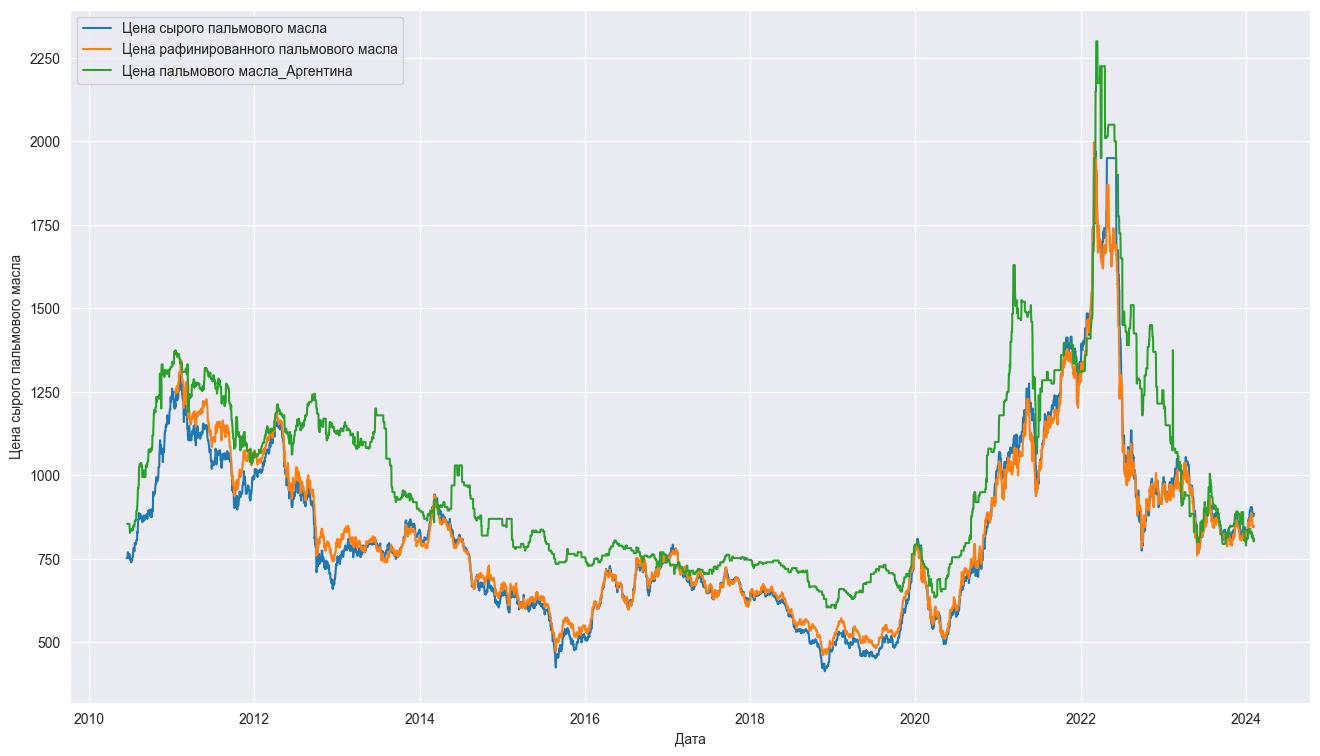

In [437]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=df['Дата'], y=df['Цена сырого пальмового масла'], label='Цена сырого пальмового масла')
sns.lineplot(x=df['Дата'], y=df['Цена рафинированного пальмового масла'], \
             label='Цена рафинированного пальмового масла')
sns.lineplot(x=df['Дата'], y=df['Цена пальмового масла_Аргентина'], label='Цена пальмового масла_Аргентина')
plt.show()

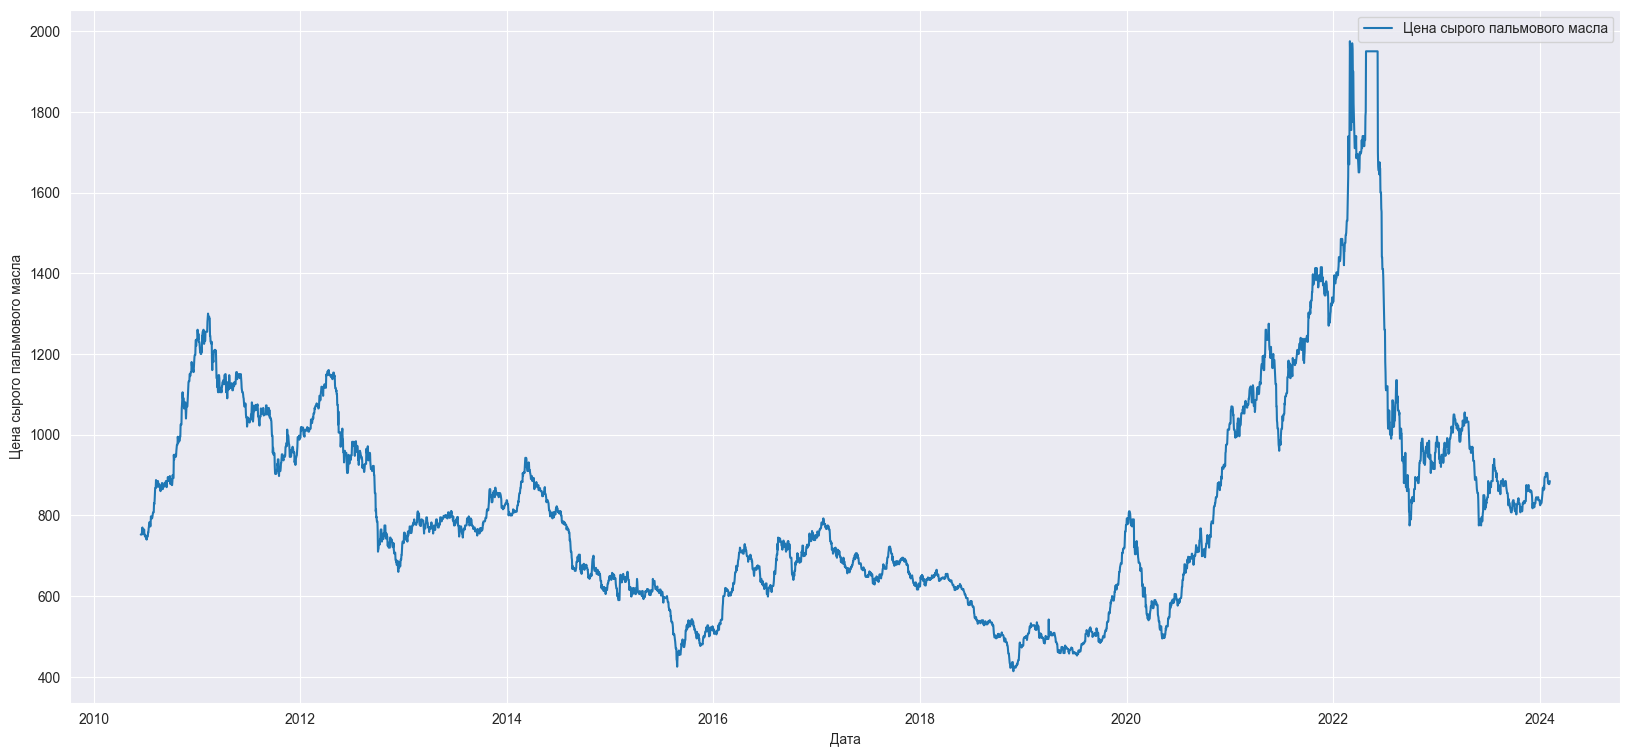

In [438]:
plt.figure(figsize=(20, 9))
sns.lineplot(x=df['Дата'], y=df['Цена сырого пальмового масла'], label='Цена сырого пальмового масла');

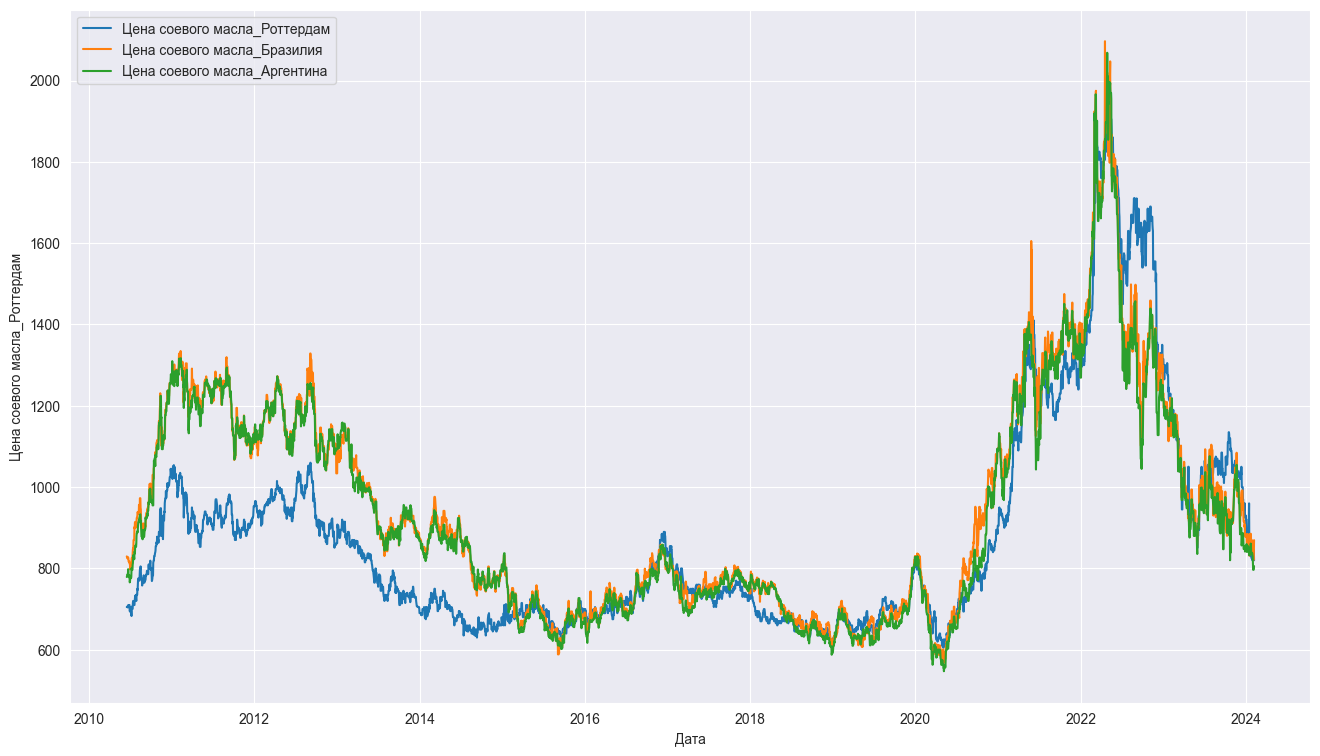

In [439]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=df['Дата'], y=df['Цена соевого масла_Роттердам'], label='Цена соевого масла_Роттердам')
sns.lineplot(x=df['Дата'], y=df['Цена соевого масла_Бразилия'], \
             label='Цена соевого масла_Бразилия')
sns.lineplot(x=df['Дата'], y=df['Цена соевого масла_Аргентина'], label='Цена соевого масла_Аргентина')
plt.show()

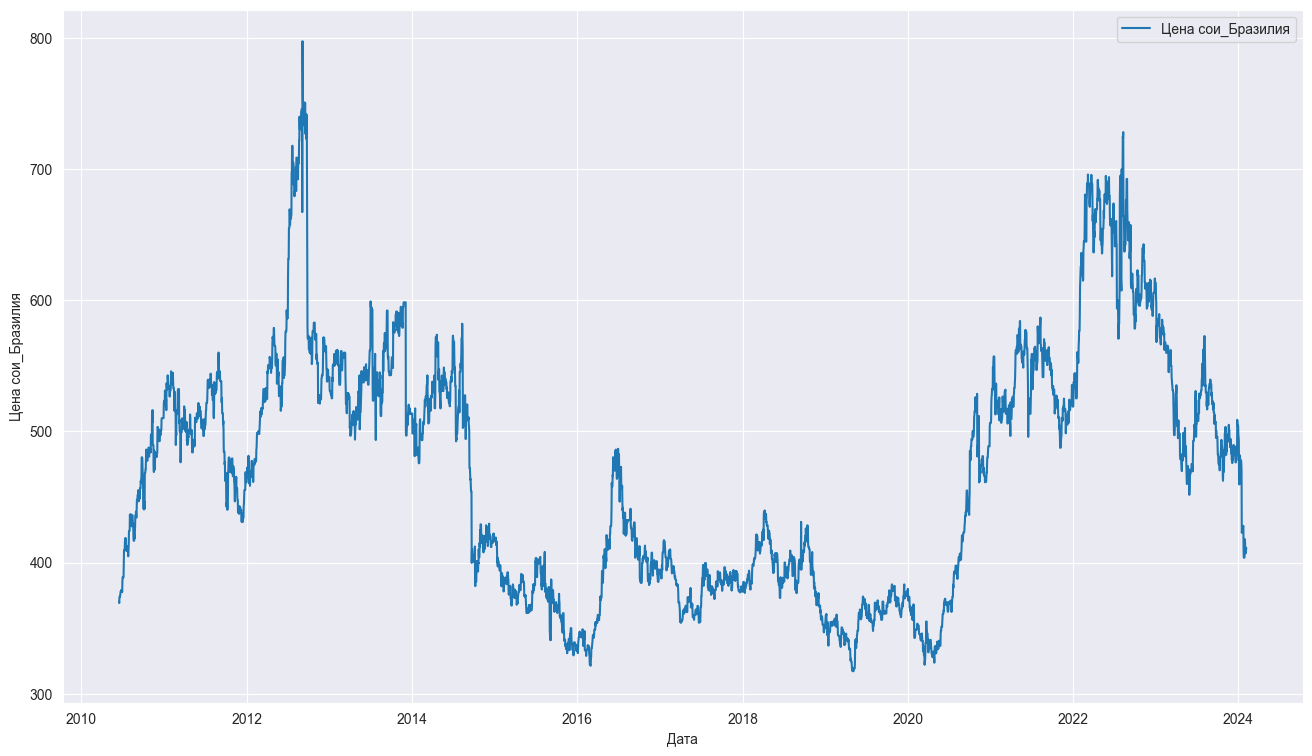

In [440]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=df['Дата'], y=df['Цена сои_Бразилия'], label='Цена сои_Бразилия')
plt.show()

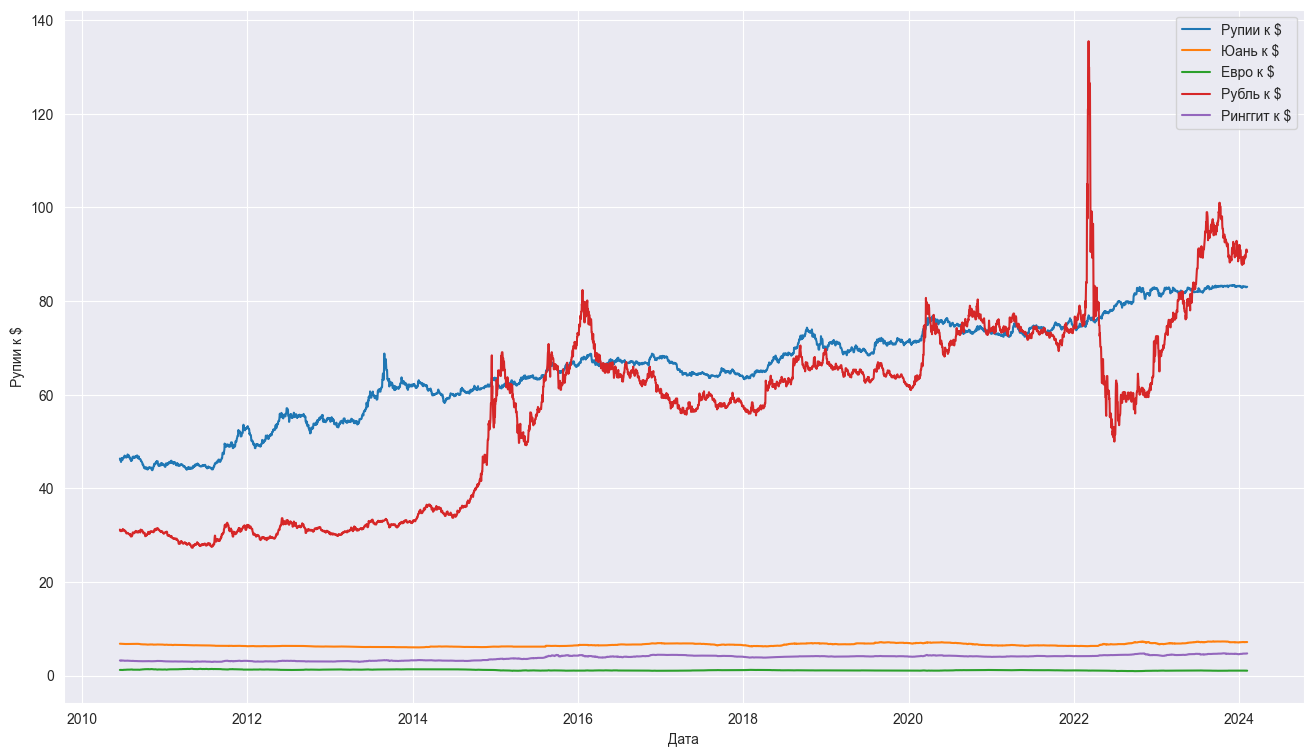

In [441]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=df['Дата'], y=df['Рупии к $'], label='Рупии к $')
sns.lineplot(x=df['Дата'], y=df['Юань к $'], label='Юань к $')
sns.lineplot(x=df['Дата'], y=df['Евро к $'], label='Евро к $')
sns.lineplot(x=df['Дата'], y=df['Рубль к $'], label='Рубль к $')
sns.lineplot(x=df['Дата'], y=df['Ринггит к $'], label='Ринггит к $')
plt.show()

interval columns not set, guessing: ['Цена соевого масла_Роттердам', 'Цена соевого масла_Бразилия', 'Цена соевого масла_Аргентина', 'Цена сои_Бразилия', 'Рупии к $', 'Юань к $', 'Евро к $', 'Рубль к $', 'Ринггит к $', 'Цена нефти_Brent', 'Цена нефти_Urals', 'Цена сырого пальмового масла', 'Цена рафинированного пальмового масла', 'Цена пальмового масла_Аргентина', 'Цена биодизеля_США']


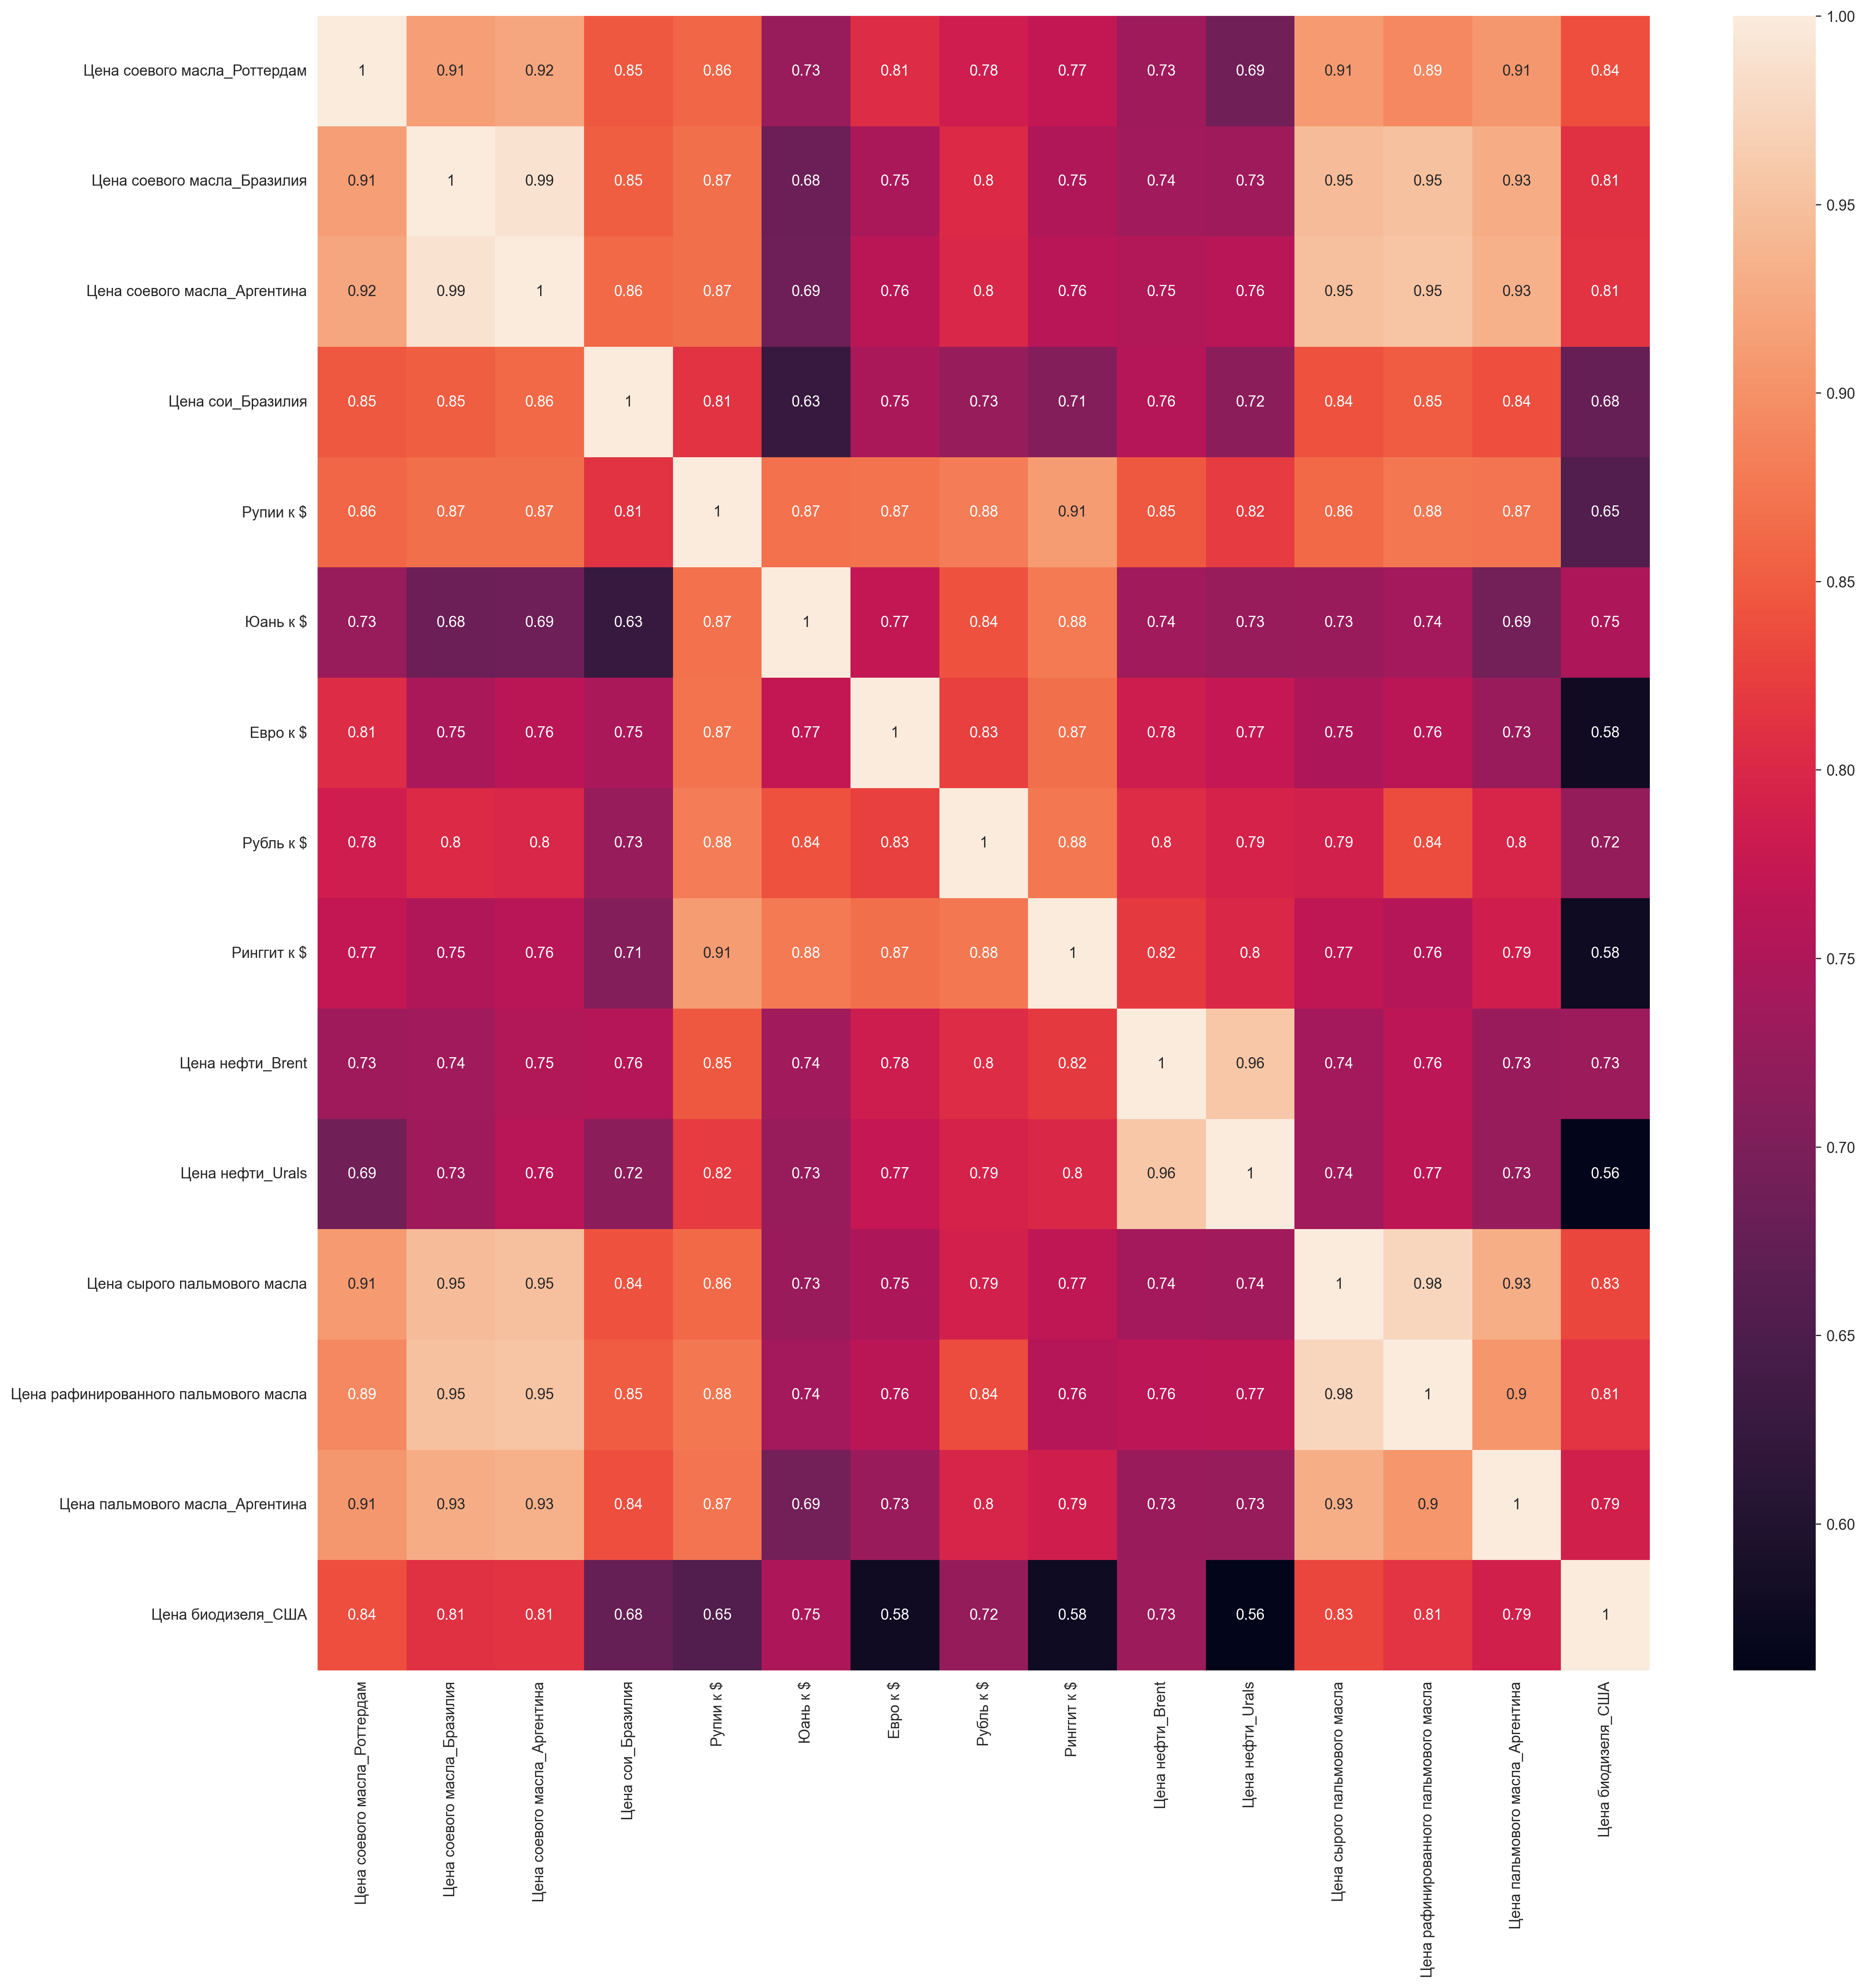

In [442]:
corr_matr = phik_matrix(df.drop('Дата', axis=1))

plt.figure(figsize=(20, 20), dpi=250)
sns.heatmap(corr_matr, annot=True);

По приведенным выше графикам видно, какие переменные и насколько сильно связаны с нашей целевой. Выведем нелинейные корреляции в виде одномерной таблицы

In [443]:
corr_matr.loc['Цена сырого пальмового масла'].transpose().sort_values(ascending=False)[1:]

Цена рафинированного пальмового масла    0.975129
Цена соевого масла_Аргентина             0.949113
Цена соевого масла_Бразилия              0.945370
Цена пальмового масла_Аргентина          0.931396
Цена соевого масла_Роттердам             0.910272
Рупии к $                                0.861706
Цена сои_Бразилия                        0.841495
Цена биодизеля_США                       0.831399
Рубль к $                                0.790207
Ринггит к $                              0.767769
Евро к $                                 0.749614
Цена нефти_Brent                         0.739671
Цена нефти_Urals                         0.736027
Юань к $                                 0.729210
Name: Цена сырого пальмового масла, dtype: float64

In [444]:
features = corr_matr.loc['Цена сырого пальмового масла'].transpose().sort_values(ascending=False).index[:6]

In [445]:
features = list(features)
features.append('Дата')

In [446]:
features

['Цена сырого пальмового масла',
 'Цена рафинированного пальмового масла',
 'Цена соевого масла_Аргентина',
 'Цена соевого масла_Бразилия',
 'Цена пальмового масла_Аргентина',
 'Цена соевого масла_Роттердам',
 'Дата']

# TSfresh - помощник по временным рядам

TSfresh - библиотека, которая автоматически считает большое количество признаков для временных рядов. Так же содержит инструменты для интерпретации силы и важности этих признаков в задачах регрессии и классификации. Теперь сгенерируем фичи для временных рядов.

In [447]:
from tsfresh.feature_extraction import MinimalFCParameters
from pprint import pprint

In [448]:
pprint(MinimalFCParameters())

{'absolute_maximum': None,
 'length': None,
 'maximum': None,
 'mean': None,
 'median': None,
 'minimum': None,
 'root_mean_square': None,
 'standard_deviation': None,
 'sum_values': None,
 'variance': None}


In [449]:
ts = df[features]

In [450]:
ts.dropna(inplace=True)

C:\Users\lebed\AppData\Local\Temp\ipykernel_12576\970375562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.dropna(inplace=True)


In [451]:
ts.head()

,Цена сырого пальмового масла,Цена рафинированного пальмового масла,Цена соевого масла_Аргентина,Цена соевого масла_Бразилия,Цена пальмового масла_Аргентина,Цена соевого масла_Роттердам,Дата
215,1215.0,1250.0,1258.85,1273.6,1370.0,1021.0,2011-01-17
216,1205.0,1245.0,1261.05,1279.8,1375.0,1033.0,2011-01-18
217,1245.0,1255.0,1279.79,1282.9,1367.5,1025.0,2011-01-19
218,1245.0,1255.0,1287.29,1273.4,1372.5,1015.0,2011-01-20
219,1255.0,1260.0,1278.91,1288.8,1365.0,1013.0,2011-01-21


In [452]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 215 to 4983
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Цена сырого пальмового масла           4769 non-null   float64       
 1   Цена рафинированного пальмового масла  4769 non-null   float64       
 2   Цена соевого масла_Аргентина           4769 non-null   float64       
 3   Цена соевого масла_Бразилия            4769 non-null   float64       
 4   Цена пальмового масла_Аргентина        4769 non-null   float64       
 5   Цена соевого масла_Роттердам           4769 non-null   float64       
 6   Дата                                   4769 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 298.1 KB


In [453]:
le = LabelEncoder()
le_ = LabelEncoder()

def generate_date_features(df: pd.DataFrame) -> pd.DataFrame:
    if 'Дата' in df.columns:
        df.rename(columns={'Дата': 'date'}, inplace=True)

    df['season'] = le.fit_transform(df['date'].dt.month.map({1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'autumn', 10: 'autumn', 11: 'autumn', 12: 'winter'}))

    df['day_of_month'] = df['date'].dt.day

    df['month'] = df['date'].dt.month

    df['day_of_week'] = le_.fit_transform(df['date'].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}))

    return df

In [454]:
ts = generate_date_features(ts)

C:\Users\lebed\AppData\Local\Temp\ipykernel_12576\580120635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Дата': 'date'}, inplace=True)
C:\Users\lebed\AppData\Local\Temp\ipykernel_12576\580120635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = le.fit_transform(df['date'].dt.month.map({1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'autumn', 10: 'autumn', 11: 'autumn', 12: 'winter'}))
C:\Users\lebed\AppData\Local\Temp\ipykernel_12576\580120635.py:10: SettingWit

In [455]:
ts

,Цена сырого пальмового масла,Цена рафинированного пальмового масла,Цена соевого масла_Аргентина,Цена соевого масла_Бразилия,Цена пальмового масла_Аргентина,Цена соевого масла_Роттердам,date,season,day_of_month,month,day_of_week
215,1215.0,1250.0,1258.85,1273.6,1370.0,1021.0,2011-01-17,3,17,1,1
216,1205.0,1245.0,1261.05,1279.8,1375.0,1033.0,2011-01-18,3,18,1,5
217,1245.0,1255.0,1279.79,1282.9,1367.5,1025.0,2011-01-19,3,19,1,6
218,1245.0,1255.0,1287.29,1273.4,1372.5,1015.0,2011-01-20,3,20,1,4
219,1255.0,1260.0,1278.91,1288.8,1365.0,1013.0,2011-01-21,3,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4979,877.5,845.0,796.53,820.8,812.5,840.0,2024-02-02,3,2,2,0
4980,877.5,845.0,796.53,820.8,812.5,840.0,2024-02-03,3,3,2,2
4981,877.5,845.0,796.53,820.8,812.5,840.0,2024-02-04,3,4,2,3
4982,880.0,845.0,800.94,834.0,802.5,845.0,2024-02-05,3,5,2,1


In [456]:
fc_param = MinimalFCParameters()

fc_param.update({
     'linear_trend': [{'attr': 'pvalue'}, {'attr': 'slope'}],
     'variance_larger_than_standard_deviation': None,
     'large_standard_deviation': [{'r': 0.05}, {'r': 0.1}]
})

del fc_param['absolute_maximum']

In [457]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 215 to 4983
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Цена сырого пальмового масла           4769 non-null   float64       
 1   Цена рафинированного пальмового масла  4769 non-null   float64       
 2   Цена соевого масла_Аргентина           4769 non-null   float64       
 3   Цена соевого масла_Бразилия            4769 non-null   float64       
 4   Цена пальмового масла_Аргентина        4769 non-null   float64       
 5   Цена соевого масла_Роттердам           4769 non-null   float64       
 6   date                                   4769 non-null   datetime64[ns]
 7   season                                 4769 non-null   int32         
 8   day_of_month                           4769 non-null   int32         
 9   month                                  4769 non-null   int32      

In [458]:
for col in ts.columns:
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [459]:
from tsfresh import extract_features

season_features = extract_features(ts[['date', 'season', 'Цена сырого пальмового масла',
                                         'Цена рафинированного пальмового масла',
                                         'Цена соевого масла_Аргентина',
                                         'Цена соевого масла_Бразилия',
                                         'Цена пальмового масла_Аргентина',
                                         'Цена соевого масла_Роттердам']], column_id='season', column_sort="date", default_fc_parameters=fc_param)
season_features.head()

Feature Extraction: 100%|██████████| 24/24 [00:03<00:00,  6.98it/s]


,Цена сырого пальмового масла__sum_values,Цена сырого пальмового масла__median,Цена сырого пальмового масла__mean,Цена сырого пальмового масла__length,Цена сырого пальмового масла__standard_deviation,Цена сырого пальмового масла__variance,Цена сырого пальмового масла__root_mean_square,Цена сырого пальмового масла__maximum,Цена сырого пальмового масла__minimum,"Цена сырого пальмового масла__linear_trend__attr_""pvalue""",...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
0,906613.33,730.00,766.367988,1183.0,217.736443,47409.158548,796.698846,1415.0,413.75,9.857827e-11,...,273.297292,74691.409606,926.351250,1710.0,627.0,6.321226e-78,0.404967,1.0,1.0,1.0
1,1058469.00,778.75,885.007525,1196.0,350.730105,123011.606549,951.971599,1975.0,458.75,3.998690e-09,...,316.205740,99986.069980,945.274053,1980.0,605.0,8.621750e-42,0.345688,1.0,1.0,1.0
2,951821.07,767.50,795.837015,1196.0,246.098571,60564.506648,833.019244,1950.0,425.00,1.191812e-02,...,279.420636,78075.891638,922.597743,1790.0,630.0,3.016092e-54,0.345760,1.0,1.0,1.0
3,991732.84,782.50,830.597018,1194.0,250.971291,62986.589073,867.685425,1830.0,422.50,9.134140e-12,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.259370,1.0,1.0,1.0


In [460]:
season_features

,Цена сырого пальмового масла__sum_values,Цена сырого пальмового масла__median,Цена сырого пальмового масла__mean,Цена сырого пальмового масла__length,Цена сырого пальмового масла__standard_deviation,Цена сырого пальмового масла__variance,Цена сырого пальмового масла__root_mean_square,Цена сырого пальмового масла__maximum,Цена сырого пальмового масла__minimum,"Цена сырого пальмового масла__linear_trend__attr_""pvalue""",...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
0,906613.33,730.00,766.367988,1183.0,217.736443,47409.158548,796.698846,1415.0,413.75,9.857827e-11,...,273.297292,74691.409606,926.351250,1710.0,627.0,6.321226e-78,0.404967,1.0,1.0,1.0
1,1058469.00,778.75,885.007525,1196.0,350.730105,123011.606549,951.971599,1975.0,458.75,3.998690e-09,...,316.205740,99986.069980,945.274053,1980.0,605.0,8.621750e-42,0.345688,1.0,1.0,1.0
2,951821.07,767.50,795.837015,1196.0,246.098571,60564.506648,833.019244,1950.0,425.00,1.191812e-02,...,279.420636,78075.891638,922.597743,1790.0,630.0,3.016092e-54,0.345760,1.0,1.0,1.0
3,991732.84,782.50,830.597018,1194.0,250.971291,62986.589073,867.685425,1830.0,422.50,9.134140e-12,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.259370,1.0,1.0,1.0


In [461]:
season_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 84 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Цена сырого пальмового масла__sum_values                                        4 non-null      float64
 1   Цена сырого пальмового масла__median                                            4 non-null      float64
 2   Цена сырого пальмового масла__mean                                              4 non-null      float64
 3   Цена сырого пальмового масла__length                                            4 non-null      float64
 4   Цена сырого пальмового масла__standard_deviation                                4 non-null      float64
 5   Цена сырого пальмового масла__variance                                          4 non-null      float64
 6   Цена сырого пальмового масл

In [462]:
month_feature = extract_features(ts[['date', 'month', 'Цена сырого пальмового масла',
                                         'Цена рафинированного пальмового масла',
                                         'Цена соевого масла_Аргентина',
                                         'Цена соевого масла_Бразилия',
                                         'Цена пальмового масла_Аргентина',
                                         'Цена соевого масла_Роттердам']], column_id='month', column_sort='date', default_fc_parameters=fc_param)
month_feature.head()

Feature Extraction: 100%|██████████| 24/24 [00:03<00:00,  7.24it/s]


,Цена сырого пальмового масла__sum_values,Цена сырого пальмового масла__median,Цена сырого пальмового масла__mean,Цена сырого пальмового масла__length,Цена сырого пальмового масла__standard_deviation,Цена сырого пальмового масла__variance,Цена сырого пальмового масла__root_mean_square,Цена сырого пальмового масла__maximum,Цена сырого пальмового масла__minimum,"Цена сырого пальмового масла__linear_trend__attr_""pvalue""",...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
1,349957.75,792.500,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,0.000012,...,207.581364,43090.022739,897.281784,1400.0,615.0,2.884303e-17,0.683652,1.0,1.0,1.0
2,325076.50,782.500,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,0.087148,...,218.730329,47842.956652,898.496965,1590.0,665.0,1.903346e-11,0.687472,1.0,1.0,1.0
3,357087.00,780.000,886.071960,403.0,336.671305,113347.567713,947.877147,1975.0,482.50,0.001768,...,300.305742,90183.538843,941.705073,1860.0,640.0,3.136034e-15,0.978880,1.0,1.0,1.0
4,345669.50,771.875,886.332051,390.0,331.667288,110003.190062,946.354952,1950.0,481.25,0.001552,...,313.461204,98257.926601,941.938568,1980.0,610.0,8.144849e-14,1.019378,1.0,1.0,1.0
5,355712.50,791.250,882.661290,403.0,381.124783,145256.099916,961.429692,1950.0,458.75,0.000135,...,333.842896,111451.078903,952.034316,1980.0,605.0,7.368624e-16,1.110956,1.0,1.0,1.0


In [463]:
month_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 84 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Цена сырого пальмового масла__sum_values                                        12 non-null     float64
 1   Цена сырого пальмового масла__median                                            12 non-null     float64
 2   Цена сырого пальмового масла__mean                                              12 non-null     float64
 3   Цена сырого пальмового масла__length                                            12 non-null     float64
 4   Цена сырого пальмового масла__standard_deviation                                12 non-null     float64
 5   Цена сырого пальмового масла__variance                                          12 non-null     float64
 6   Цена сырого пальмового ма

In [464]:
day_week_feature = extract_features(ts[['date', 'day_of_week', 'Цена сырого пальмового масла',
                                         'Цена рафинированного пальмового масла',
                                         'Цена соевого масла_Аргентина',
                                         'Цена соевого масла_Бразилия',
                                         'Цена пальмового масла_Аргентина',
                                         'Цена соевого масла_Роттердам']], column_id='day_of_week', column_sort='date', default_fc_parameters=fc_param)
day_week_feature.head()

Feature Extraction: 100%|██████████| 21/21 [00:03<00:00,  5.96it/s]


,Цена сырого пальмового масла__sum_values,Цена сырого пальмового масла__median,Цена сырого пальмового масла__mean,Цена сырого пальмового масла__length,Цена сырого пальмового масла__standard_deviation,Цена сырого пальмового масла__variance,Цена сырого пальмового масла__root_mean_square,Цена сырого пальмового масла__maximum,Цена сырого пальмового масла__minimum,"Цена сырого пальмового масла__linear_trend__attr_""pvalue""",...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
0,558058.00,767.5,819.468429,681.0,273.727593,74926.795080,863.976447,1950.0,422.50,0.000157,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
1,558980.75,765.0,819.619868,682.0,274.876048,75556.842028,864.484569,1950.0,420.00,0.000184,...,273.859958,74999.276339,923.762509,1960.0,605.0,2.544867e-31,0.591481,1.0,1.0,1.0
2,558058.00,767.5,819.468429,681.0,273.727593,74926.795080,863.976447,1950.0,422.50,0.000157,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
3,558058.00,767.5,819.468429,681.0,273.727593,74926.795080,863.976447,1950.0,422.50,0.000157,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
4,558050.66,767.5,819.457651,681.0,275.275417,75776.555110,864.457863,1955.0,423.75,0.000147,...,272.347130,74172.958991,922.442788,1900.0,610.0,2.823198e-31,0.589065,1.0,1.0,1.0


In [465]:
day_month_feature = extract_features(ts[['date', 'day_of_month', 'Цена сырого пальмового масла',
                                         'Цена рафинированного пальмового масла',
                                         'Цена соевого масла_Аргентина',
                                         'Цена соевого масла_Бразилия',
                                         'Цена пальмового масла_Аргентина',
                                         'Цена соевого масла_Роттердам']], column_id='day_of_month', column_sort='date', default_fc_parameters=fc_param)
day_month_feature.head()

Feature Extraction: 100%|██████████| 27/27 [00:03<00:00,  7.83it/s]


,Цена сырого пальмового масла__sum_values,Цена сырого пальмового масла__median,Цена сырого пальмового масла__mean,Цена сырого пальмового масла__length,Цена сырого пальмового масла__standard_deviation,Цена сырого пальмового масла__variance,Цена сырого пальмового масла__root_mean_square,Цена сырого пальмового масла__maximum,Цена сырого пальмового масла__minimum,"Цена сырого пальмового масла__linear_trend__attr_""pvalue""",...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
1,128831.21,768.75,820.580955,157.0,281.311416,79136.112581,867.461363,1975.0,425.00,0.068694,...,271.373113,73643.366546,919.395516,1980.0,610.0,5.643573e-08,2.495637,1.0,1.0,1.0
2,128768.46,767.50,820.181274,157.0,280.706036,78795.878774,866.887075,1950.0,425.00,0.076784,...,267.862228,71750.173192,917.600777,1960.0,610.0,8.089679e-08,2.436695,1.0,1.0,1.0
3,128948.46,767.50,821.327771,157.0,281.321462,79141.764901,868.171107,1950.0,423.75,0.069509,...,271.398453,73657.120532,921.776670,1875.0,610.0,4.940121e-08,2.505755,1.0,1.0,1.0
4,128881.96,766.25,820.904204,157.0,276.911188,76679.805833,866.350690,1950.0,423.75,0.070977,...,271.032816,73458.787212,922.752770,1885.0,605.0,3.624706e-08,2.525137,1.0,1.0,1.0
5,129010.50,765.00,821.722930,157.0,277.132309,76802.316544,867.197146,1950.0,422.50,0.063418,...,272.883857,74465.599172,924.795154,1900.0,625.0,2.898090e-08,2.558764,1.0,1.0,1.0


In [466]:
season_features.shape

(4, 84)

In [467]:
month_feature.shape

(12, 84)

In [468]:
day_month_feature.shape

(31, 84)

In [469]:
day_week_feature.shape

(7, 84)

Было вытянуто очень много статистических признаков. Не все из них полезны, но ненужные можно будет отсеять позже.

In [470]:
X = ts[['date', 'month', 'day_of_month', 'day_of_week', 'season']]

In [471]:
X

,date,month,day_of_month,day_of_week,season
215,2011-01-17,1,17,1,3
216,2011-01-18,1,18,5,3
217,2011-01-19,1,19,6,3
218,2011-01-20,1,20,4,3
219,2011-01-21,1,21,0,3
...,...,...,...,...,...
4979,2024-02-02,2,2,0,3
4980,2024-02-03,2,3,2,3
4981,2024-02-04,2,4,3,3
4982,2024-02-05,2,5,1,3


In [472]:
month_feature.reset_index()

,index,Цена сырого пальмового масла__sum_values,Цена сырого пальмового масла__median,Цена сырого пальмового масла__mean,Цена сырого пальмового масла__length,Цена сырого пальмового масла__standard_deviation,Цена сырого пальмового масла__variance,Цена сырого пальмового масла__root_mean_square,Цена сырого пальмового масла__maximum,Цена сырого пальмового масла__minimum,...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
0,1,349957.75,792.500,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,207.581364,43090.022739,897.281784,1400.0,615.0,2.884303e-17,0.683652,1.0,1.0,1.0
1,2,325076.50,782.500,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,218.730329,47842.956652,898.496965,1590.0,665.0,1.903346e-11,0.687472,1.0,1.0,1.0
2,3,357087.00,780.000,886.071960,403.0,336.671305,113347.567713,947.877147,1975.0,482.50,...,300.305742,90183.538843,941.705073,1860.0,640.0,3.136034e-15,0.978880,1.0,1.0,1.0
3,4,345669.50,771.875,886.332051,390.0,331.667288,110003.190062,946.354952,1950.0,481.25,...,313.461204,98257.926601,941.938568,1980.0,610.0,8.144849e-14,1.019378,1.0,1.0,1.0
4,5,355712.50,791.250,882.661290,403.0,381.124783,145256.099916,961.429692,1950.0,458.75,...,333.842896,111451.078903,952.034316,1980.0,605.0,7.368624e-16,1.110956,1.0,1.0,1.0
5,6,321996.75,791.250,825.632692,390.0,302.522431,91519.821335,879.311756,1950.0,457.50,...,293.797282,86316.842972,927.232668,1790.0,635.0,3.168121e-17,1.069384,1.0,1.0,1.0
6,7,314328.70,772.500,779.971960,403.0,209.659442,43957.081695,807.659174,1260.0,452.50,...,262.035099,68662.392860,913.331536,1630.0,635.0,2.208286e-18,0.939180,1.0,1.0,1.0
7,8,315495.62,740.000,782.867543,403.0,214.327143,45936.124054,811.675868,1210.0,425.00,...,281.918904,79478.268316,927.308713,1710.0,630.0,5.946683e-22,1.101777,1.0,1.0,1.0
8,9,298403.75,731.875,765.137821,390.0,204.737346,41917.380845,792.056352,1245.0,455.00,...,272.641183,74333.214471,925.032406,1710.0,627.0,1.390343e-19,1.057339,1.0,1.0,1.0
9,10,303256.37,730.000,752.497196,403.0,211.699866,44816.833162,781.708938,1412.5,486.25,...,277.674627,77103.198653,926.329026,1685.0,635.0,5.264868e-32,1.291116,1.0,1.0,1.0


In [473]:
pd.concat([month_feature.reset_index(), season_features.reset_index(), day_month_feature.reset_index(), day_week_feature.reset_index()], axis=1)

,index,Цена сырого пальмового масла__sum_values,Цена сырого пальмового масла__median,Цена сырого пальмового масла__mean,Цена сырого пальмового масла__length,Цена сырого пальмового масла__standard_deviation,Цена сырого пальмового масла__variance,Цена сырого пальмового масла__root_mean_square,Цена сырого пальмового масла__maximum,Цена сырого пальмового масла__minimum,...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
0,1.0,349957.75,792.500,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
1,2.0,325076.50,782.500,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,273.859958,74999.276339,923.762509,1960.0,605.0,2.544867e-31,0.591481,1.0,1.0,1.0
2,3.0,357087.00,780.000,886.071960,403.0,336.671305,113347.567713,947.877147,1975.0,482.50,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
3,4.0,345669.50,771.875,886.332051,390.0,331.667288,110003.190062,946.354952,1950.0,481.25,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
4,5.0,355712.50,791.250,882.661290,403.0,381.124783,145256.099916,961.429692,1950.0,458.75,...,272.347130,74172.958991,922.442788,1900.0,610.0,2.823198e-31,0.589065,1.0,1.0,1.0
5,6.0,321996.75,791.250,825.632692,390.0,302.522431,91519.821335,879.311756,1950.0,457.50,...,273.256104,74668.898264,923.124274,1885.0,610.0,3.877632e-31,0.588529,1.0,1.0,1.0
6,7.0,314328.70,772.500,779.971960,403.0,209.659442,43957.081695,807.659174,1260.0,452.50,...,273.783123,74957.198510,923.940615,1905.0,610.0,2.268812e-31,0.593028,1.0,1.0,1.0
7,8.0,315495.62,740.000,782.867543,403.0,214.327143,45936.124054,811.675868,1210.0,425.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,298403.75,731.875,765.137821,390.0,204.737346,41917.380845,792.056352,1245.0,455.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,303256.37,730.000,752.497196,403.0,211.699866,44816.833162,781.708938,1412.5,486.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
X = pd.merge(X.rename(columns={'month': 'index'}), month_feature.reset_index(), on='index')
X.drop('index', axis=1, inplace=True)

In [475]:
X = pd.merge(X.rename(columns={'day_of_month': 'index'}), day_month_feature.reset_index(), on='index')
X.drop('index', axis=1, inplace=True)
X

,date,day_of_week,season,Цена сырого пальмового масла__sum_values_x,Цена сырого пальмового масла__median_x,Цена сырого пальмового масла__mean_x,Цена сырого пальмового масла__length_x,Цена сырого пальмового масла__standard_deviation_x,Цена сырого пальмового масла__variance_x,Цена сырого пальмового масла__root_mean_square_x,...,Цена соевого масла_Роттердам__standard_deviation_y,Цена соевого масла_Роттердам__variance_y,Цена соевого масла_Роттердам__root_mean_square_y,Цена соевого масла_Роттердам__maximum_y,Цена соевого масла_Роттердам__minimum_y,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""_y","Цена соевого масла_Роттердам__linear_trend__attr_""slope""_y",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation_y,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05_y,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1_y
0,2011-01-17,1,3,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,...,272.633749,74329.161021,925.339164,1885.0,615.0,2.548810e-08,2.565749,1.0,1.0,1.0
1,2011-01-18,5,3,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,...,270.881156,73376.600714,924.331028,1870.0,627.0,2.535362e-08,2.549636,1.0,1.0,1.0
2,2011-01-19,6,3,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,...,271.094800,73492.390442,923.571630,1845.0,627.0,3.324960e-08,2.532010,1.0,1.0,1.0
3,2011-01-20,4,3,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,...,269.689201,72732.264919,923.315360,1845.0,627.0,3.367341e-08,2.517964,1.0,1.0,1.0
4,2011-01-21,0,3,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,...,269.530651,72646.771918,922.870046,1845.0,625.0,2.659632e-08,2.533494,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,2024-02-02,0,3,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,...,267.862228,71750.173192,917.600777,1960.0,610.0,8.089679e-08,2.436695,1.0,1.0,1.0
4765,2024-02-03,2,3,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,...,271.398453,73657.120532,921.776670,1875.0,610.0,4.940121e-08,2.505755,1.0,1.0,1.0
4766,2024-02-04,3,3,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,...,271.032816,73458.787212,922.752770,1885.0,605.0,3.624706e-08,2.525137,1.0,1.0,1.0
4767,2024-02-05,1,3,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,...,272.883857,74465.599172,924.795154,1900.0,625.0,2.898090e-08,2.558764,1.0,1.0,1.0


In [476]:
X.columns

Index(['date', 'day_of_week', 'season',
       'Цена сырого пальмового масла__sum_values_x',
       'Цена сырого пальмового масла__median_x',
       'Цена сырого пальмового масла__mean_x',
       'Цена сырого пальмового масла__length_x',
       'Цена сырого пальмового масла__standard_deviation_x',
       'Цена сырого пальмового масла__variance_x',
       'Цена сырого пальмового масла__root_mean_square_x',
       ...
       'Цена соевого масла_Роттердам__standard_deviation_y',
       'Цена соевого масла_Роттердам__variance_y',
       'Цена соевого масла_Роттердам__root_mean_square_y',
       'Цена соевого масла_Роттердам__maximum_y',
       'Цена соевого масла_Роттердам__minimum_y',
       'Цена соевого масла_Роттердам__linear_trend__attr_"pvalue"_y',
       'Цена соевого масла_Роттердам__linear_trend__attr_"slope"_y',
       'Цена соевого масла_Роттердам__variance_larger_than_standard_deviation_y',
       'Цена соевого масла_Роттердам__large_standard_deviation__r_0.05_y',
       'Цена 

In [477]:
X = pd.merge(X.rename(columns={'season': 'index'}), season_features.reset_index(), on='index', suffixes=['_X', '_season'])
X.drop('index', axis=1, inplace=True)
X

,date,day_of_week,Цена сырого пальмового масла__sum_values_x,Цена сырого пальмового масла__median_x,Цена сырого пальмового масла__mean_x,Цена сырого пальмового масла__length_x,Цена сырого пальмового масла__standard_deviation_x,Цена сырого пальмового масла__variance_x,Цена сырого пальмового масла__root_mean_square_x,Цена сырого пальмового масла__maximum_x,...,Цена соевого масла_Роттердам__standard_deviation,Цена соевого масла_Роттердам__variance,Цена соевого масла_Роттердам__root_mean_square,Цена соевого масла_Роттердам__maximum,Цена соевого масла_Роттердам__minimum,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""","Цена соевого масла_Роттердам__linear_trend__attr_""slope""",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1
0,2011-01-17,1,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
1,2011-01-18,5,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
2,2011-01-19,6,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
3,2011-01-20,4,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
4,2011-01-21,0,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,2024-02-02,0,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
4765,2024-02-03,2,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
4766,2024-02-04,3,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0
4767,2024-02-05,1,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,...,212.819402,45292.097994,898.014462,1590.0,615.0,3.068082e-52,0.25937,1.0,1.0,1.0


In [478]:
X = pd.merge(X.rename(columns={'day_of_week': 'index'}), day_week_feature.reset_index(), on='index', suffixes=['_X1', '_week'])
X.drop('index', axis=1, inplace=True)
X

,date,Цена сырого пальмового масла__sum_values_x,Цена сырого пальмового масла__median_x,Цена сырого пальмового масла__mean_x,Цена сырого пальмового масла__length_x,Цена сырого пальмового масла__standard_deviation_x,Цена сырого пальмового масла__variance_x,Цена сырого пальмового масла__root_mean_square_x,Цена сырого пальмового масла__maximum_x,Цена сырого пальмового масла__minimum_x,...,Цена соевого масла_Роттердам__standard_deviation_week,Цена соевого масла_Роттердам__variance_week,Цена соевого масла_Роттердам__root_mean_square_week,Цена соевого масла_Роттердам__maximum_week,Цена соевого масла_Роттердам__minimum_week,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""_week","Цена соевого масла_Роттердам__linear_trend__attr_""slope""_week",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation_week,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05_week,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1_week
0,2011-01-17,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,273.859958,74999.276339,923.762509,1960.0,605.0,2.544867e-31,0.591481,1.0,1.0,1.0
1,2011-01-18,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,273.256104,74668.898264,923.124274,1885.0,610.0,3.877632e-31,0.588529,1.0,1.0,1.0
2,2011-01-19,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,273.783123,74957.198510,923.940615,1905.0,610.0,2.268812e-31,0.593028,1.0,1.0,1.0
3,2011-01-20,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,272.347130,74172.958991,922.442788,1900.0,610.0,2.823198e-31,0.589065,1.0,1.0,1.0
4,2011-01-21,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,2024-02-02,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
4765,2024-02-03,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
4766,2024-02-04,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,272.756860,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0
4767,2024-02-05,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,273.859958,74999.276339,923.762509,1960.0,605.0,2.544867e-31,0.591481,1.0,1.0,1.0


In [479]:
y = df.set_index('Дата')[['Цена сырого пальмового масла']].loc['2011-01-17':]
y.reset_index(inplace=True)
y.rename(columns={'Дата': 'date'}, inplace=True)
y.shape

(4769, 2)

In [480]:
y

,date,Цена сырого пальмового масла
0,2011-01-17,1215.0
1,2011-01-18,1205.0
2,2011-01-19,1245.0
3,2011-01-20,1245.0
4,2011-01-21,1255.0
...,...,...
4764,2024-02-02,877.5
4765,2024-02-03,877.5
4766,2024-02-04,877.5
4767,2024-02-05,880.0


In [481]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          4769 non-null   datetime64[ns]
 1   Цена сырого пальмового масла  4769 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 74.6 KB


In [482]:
df.set_index('Дата').loc['2011-01-17':]

,Цена соевого масла_Роттердам,Цена соевого масла_Бразилия,Цена соевого масла_Аргентина,Цена сои_Бразилия,Рупии к $,Юань к $,Евро к $,Рубль к $,Ринггит к $,Цена нефти_Brent,Цена нефти_Urals,Цена сырого пальмового масла,Цена рафинированного пальмового масла,Цена пальмового масла_Аргентина,Цена биодизеля_США
Дата,,,,,,,,,,,,,,,
2011-01-17,1021.0,1273.6,1258.85,542.8,45.440,6.5929,1.3292,29.9817,3.057,97.39,95.33,1215.0,1250.0,1370.0,NaN
2011-01-18,1033.0,1279.8,1261.05,539.4,45.430,6.5828,1.3379,29.8922,3.056,97.85,95.51,1205.0,1245.0,1375.0,NaN
2011-01-19,1025.0,1282.9,1279.79,536.9,45.310,6.5823,1.3466,29.8347,3.051,98.11,95.59,1245.0,1255.0,1367.5,NaN
2011-01-20,1015.0,1273.4,1287.29,535.0,45.670,6.5852,1.3476,30.0045,3.051,96.64,93.62,1245.0,1255.0,1372.5,NaN
2011-01-21,1013.0,1288.8,1278.91,534.3,45.620,6.5831,1.3615,29.8717,3.060,97.57,94.25,1255.0,1260.0,1365.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,840.0,820.8,796.53,407.2,82.999,7.1920,1.0784,90.9955,4.715,77.07,68.77,877.5,845.0,812.5,52.0
2024-02-03,840.0,820.8,796.53,407.2,82.999,7.1920,1.0784,90.9955,4.715,77.07,68.77,877.5,845.0,812.5,52.0
2024-02-04,840.0,820.8,796.53,407.2,82.999,7.1920,1.0784,90.9955,4.715,77.07,68.77,877.5,845.0,812.5,52.0


In [483]:
extract_df = pd.merge(X, y, on='date')

In [484]:
extract_df

,date,Цена сырого пальмового масла__sum_values_x,Цена сырого пальмового масла__median_x,Цена сырого пальмового масла__mean_x,Цена сырого пальмового масла__length_x,Цена сырого пальмового масла__standard_deviation_x,Цена сырого пальмового масла__variance_x,Цена сырого пальмового масла__root_mean_square_x,Цена сырого пальмового масла__maximum_x,Цена сырого пальмового масла__minimum_x,...,Цена соевого масла_Роттердам__variance_week,Цена соевого масла_Роттердам__root_mean_square_week,Цена соевого масла_Роттердам__maximum_week,Цена соевого масла_Роттердам__minimum_week,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""_week","Цена соевого масла_Роттердам__linear_trend__attr_""slope""_week",Цена соевого масла_Роттердам__variance_larger_than_standard_deviation_week,Цена соевого масла_Роттердам__large_standard_deviation__r_0.05_week,Цена соевого масла_Роттердам__large_standard_deviation__r_0.1_week,Цена сырого пальмового масла
0,2011-01-17,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,74999.276339,923.762509,1960.0,605.0,2.544867e-31,0.591481,1.0,1.0,1.0,1215.0
1,2011-01-18,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,74668.898264,923.124274,1885.0,610.0,3.877632e-31,0.588529,1.0,1.0,1.0,1205.0
2,2011-01-19,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,74957.198510,923.940615,1905.0,610.0,2.268812e-31,0.593028,1.0,1.0,1.0,1245.0
3,2011-01-20,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,74172.958991,922.442788,1900.0,610.0,2.823198e-31,0.589065,1.0,1.0,1.0,1245.0
4,2011-01-21,349957.75,792.5,837.219498,418.0,243.186578,59139.711839,871.823491,1485.0,477.50,...,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0,1255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,2024-02-02,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0,877.5
4765,2024-02-03,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0,877.5
4766,2024-02-04,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,74396.304810,923.076573,1980.0,610.0,1.806908e-31,0.591693,1.0,1.0,1.0,877.5
4767,2024-02-05,325076.50,782.5,871.518767,373.0,279.019138,77851.679272,915.093788,1830.0,496.25,...,74999.276339,923.762509,1960.0,605.0,2.544867e-31,0.591481,1.0,1.0,1.0,880.0


In [485]:
final_corr = phik_matrix(extract_df)

interval columns not set, guessing: ['Цена сырого пальмового масла__sum_values_x', 'Цена сырого пальмового масла__median_x', 'Цена сырого пальмового масла__mean_x', 'Цена сырого пальмового масла__length_x', 'Цена сырого пальмового масла__standard_deviation_x', 'Цена сырого пальмового масла__variance_x', 'Цена сырого пальмового масла__root_mean_square_x', 'Цена сырого пальмового масла__maximum_x', 'Цена сырого пальмового масла__minimum_x', 'Цена сырого пальмового масла__linear_trend__attr_"pvalue"_x', 'Цена сырого пальмового масла__linear_trend__attr_"slope"_x', 'Цена сырого пальмового масла__variance_larger_than_standard_deviation_x', 'Цена сырого пальмового масла__large_standard_deviation__r_0.05_x', 'Цена сырого пальмового масла__large_standard_deviation__r_0.1_x', 'Цена рафинированного пальмового масла__sum_values_x', 'Цена рафинированного пальмового масла__median_x', 'Цена рафинированного пальмового масла__mean_x', 'Цена рафинированного пальмового масла__length_x', 'Цена рафинирова

C:\Users\lebed\PycharmProjects\EFCO_ts_data_science\venv\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable date is large: 4769. Are you sure this is not an interval variable? Analysis for pairs of variables including date can be slow.
  warnings.warn(
C:\Users\lebed\PycharmProjects\EFCO_ts_data_science\venv\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Цена сырого пальмового масла__variance_larger_than_standard_deviation_x for analysis 1. Dropping this column
  warnings.warn(
C:\Users\lebed\PycharmProjects\EFCO_ts_data_science\venv\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Цена сырого пальмового масла__large_standard_deviation__r_0.05_x for analysis 1. Dropping this column
  warnings.warn(
C:\Users\lebed\PycharmProjects\EFCO_ts_data_science\venv\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Цена сы

In [486]:
final_corr.loc['Цена сырого пальмового масла'].sort_values(ascending=False)[2:]

Цена соевого масла_Роттердам__root_mean_square_x                0.458284
Цена сырого пальмового масла__maximum_x                         0.442371
Цена сырого пальмового масла__root_mean_square_x                0.414887
Цена соевого масла_Роттердам__linear_trend__attr_"pvalue"_X1    0.405209
Цена соевого масла_Аргентина__standard_deviation_X1             0.399670
                                                                  ...   
Цена рафинированного пальмового масла__median_y                 0.000000
Цена рафинированного пальмового масла__mean_y                   0.000000
Цена рафинированного пальмового масла__length_y                 0.000000
Цена рафинированного пальмового масла__standard_deviation_y     0.000000
Цена соевого масла_Бразилия__variance_y                         0.000000
Name: Цена сырого пальмового масла, Length: 264, dtype: float64

In [494]:
importance_features = final_corr.loc['Цена сырого пальмового масла'].sort_values(ascending=False)[2:195]
importance_features = list(importance_features.index)

In [495]:
importance_features.append('date')
importance_features.append('Цена сырого пальмового масла')

In [496]:
df_final = extract_df[importance_features]
df_final

,Цена соевого масла_Роттердам__root_mean_square_x,Цена сырого пальмового масла__maximum_x,Цена сырого пальмового масла__root_mean_square_x,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""_X1",Цена соевого масла_Аргентина__standard_deviation_X1,Цена пальмового масла_Аргентина__root_mean_square_X1,Цена соевого масла_Аргентина__variance_X1,Цена соевого масла_Бразилия__standard_deviation_X1,Цена соевого масла_Бразилия__variance_X1,Цена пальмового масла_Аргентина__median_X1,...,Цена соевого масла_Бразилия__length_week,Цена соевого масла_Бразилия__mean_week,Цена соевого масла_Бразилия__median_week,Цена соевого масла_Бразилия__sum_values_week,"Цена соевого масла_Аргентина__linear_trend__attr_""slope""_week","Цена соевого масла_Аргентина__linear_trend__attr_""pvalue""_week",Цена соевого масла_Аргентина__minimum_week,Цена сырого пальмового масла__median_week,date,Цена сырого пальмового масла
0,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,682.0,947.196334,878.0,645987.9,0.108246,0.040672,555.57,765.000,2011-01-17,1215.0
1,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,682.0,946.779912,873.6,645703.9,0.106434,0.043488,556.01,768.125,2011-01-18,1205.0
2,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,681.0,947.314831,874.6,645121.4,0.109991,0.038626,547.19,765.000,2011-01-19,1245.0
3,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,681.0,946.309104,875.7,644436.5,0.101916,0.053841,552.04,767.500,2011-01-20,1245.0
4,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,681.0,946.632159,873.7,644656.5,0.107420,0.042281,561.74,767.500,2011-01-21,1255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,898.496965,1830.0,915.093788,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,681.0,946.632159,873.7,644656.5,0.107420,0.042281,561.74,767.500,2024-02-02,877.5
4765,898.496965,1830.0,915.093788,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,681.0,946.632159,873.7,644656.5,0.107420,0.042281,561.74,767.500,2024-02-03,877.5
4766,898.496965,1830.0,915.093788,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,681.0,946.633774,873.7,644657.6,0.107420,0.042281,561.74,767.500,2024-02-04,877.5
4767,898.496965,1830.0,915.093788,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,870.0,...,682.0,947.196334,878.0,645987.9,0.108246,0.040672,555.57,765.000,2024-02-05,880.0


In [497]:
df_final.to_csv("../data/extract/data.csv")

In [498]:
df_final = pd.read_csv("../data/extract/data.csv")